# Music recommender (Item Based Collaborative Filtering Engine)

### Data cleaning and examination

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import csv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [3]:
#load data
df=pd.read_csv('/Users/jeffreyng/Music_Rec_Engine/Music-Recommender-Engine/output-data.csv')

In [403]:
#looking at data
df.artist.value_counts()[0:20]

Neil Young               27
Bonnie “Prince” Billy    22
Animal Collective        21
Guided by Voices         20
David Bowie              19
Gucci Mane               19
Prince                   18
Brian Eno                17
The Beatles              17
Lil Wayne                17
Of Montreal              17
R.E.M.                   17
The Mountain Goats       16
Robert Pollard           16
Sonic Youth              16
Deerhoof                 16
Mogwai                   16
Xiu Xiu                  15
Yo La Tengo              15
The Fall                 15
Name: artist, dtype: int64

In [5]:
#replace nan with misc.
df.genre.replace(np.nan, 'Misc', inplace=True)

In [365]:
#looking at genre breakdown
df.genre.value_counts()

Rock            6879
Electronic      3659
Experimental    1669
Rap             1644
Pop/R&B         1298
Misc            1289
Metal            762
Folk/Country     748
Jazz             282
Global           162
none              11
Name: genre, dtype: int64

In [408]:
df.genre.replace('None', 'Misc', inplace=True)

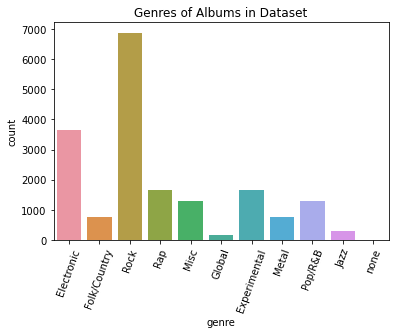

In [409]:

sns.countplot(x=df.genre, orient= 'h')
plt.xticks(rotation=70)
plt.title('Genres of Albums in Dataset')
plt.savefig('genres_of_albums.png')

In [376]:
df

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,DJ Khaled,Father of Asahd,Rawiya Kameir,5.4,2019.0,May 22 2019,none,Rap,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200
18399,Interpol,A Fine Mess EP,Brian Josephs,5.6,2019.0,May 22 2019,none,Rock,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800
18400,Injury Reserve,Injury Reserve,Sheldon Pearce,6.8,2019.0,May 22 2019,none,Rap,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769
18401,Operators,Radiant Dawn,Stuart Berman,7.7,2019.0,May 22 2019,none,Rock,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214


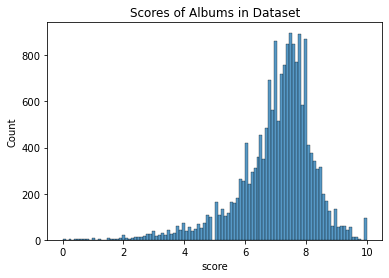

In [391]:
sns.histplot(data=df.score)
plt.title('Scores of Albums in Dataset')
plt.savefig('scores_of_albums.png')

### Now we will build our rec engine

In [1]:
#importing surprise package
import surprise

In [410]:
#making our data 
from surprise import Dataset, Reader
reader= Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['artist','album', 'score']], reader)

In [411]:
#TTS
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [412]:
#using SVD algo and fitting train data
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [413]:
#making predictions on test_Set
predictions = algo.test(testset)

In [414]:
# getting RMSE 
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.1722


1.1722456361896607

In [415]:
#looking at predictions data
predictions[:][:][3]

Prediction(uid='Lunice', iid='CCCLX', r_ui=5.7, est=7.02506883060426, details={'was_impossible': False})

In [416]:
predictions[:][:][1]

Prediction(uid='Rahim', iid='Laughter', r_ui=7.6, est=7.0677766906771256, details={'was_impossible': False})

In [417]:
#converting predictions into a df
df1= pd.DataFrame(predictions[:])

In [418]:
df1.loc[2779]

uid                     Julia Holter
iid                           Aviary
r_ui                             8.2
est                         7.446877
details    {'was_impossible': False}
Name: 2779, dtype: object

In [444]:
#function that pulls in an album name and returns top 10 similar albums indices 
def rec_album():
    y=df1.loc[df1['iid'] == 'Cake or Death'] #we enter our album name here
    container=[]
    for ele in list(df1.r_ui):
        container.append(abs(int(y.r_ui) - ele)) #looking at album ratings difference between prediction and actual 
        #finding the most similar
        
    sim= pd.Series(container) #converting list of albums into series
    sorted_sim= sim.sort_values()[0:10] #sorting series and returning top 10
    print(sorted_sim) #printout
    return sorted_sim #top ten sorted


In [445]:
# returning album indices of recommended albums to 'Beat Happening'
rec_album()
# we can then use df1.loc[index] to find our actual album

2997    0.0
168     0.0
3016    0.0
3480    0.0
856     0.0
2279    0.0
174     0.0
2270    0.0
585     0.0
2256    0.0
dtype: float64


2997    0.0
168     0.0
3016    0.0
3480    0.0
856     0.0
2279    0.0
174     0.0
2270    0.0
585     0.0
2256    0.0
dtype: float64

In [446]:
df1.loc[168]

uid           Francis and the Lights
iid                  Like A Dream EP
r_ui                             7.0
est                         7.025069
details    {'was_impossible': False}
Name: 168, dtype: object